In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# loading the last 2 columns
X = df.iloc[:, [3,4]].values

# K-Means clustering

Using elbow method to find optimal number of clusters

### Elbow method

In [14]:
from sklearn.cluster import KMeans

#within clusters sum of squares
wss=[]

for i in range(1,20):
    kmeans = KMeans(i)
    y_ = kmeans.fit(X)
    wcss_inertia = kmeans.inertia_
    wss.append(wcss_inertia)

print(wss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37442.24745037571, 30259.65720728547, 24995.96978113596, 21829.135638779822, 19676.6125856028, 17595.28888108518, 16077.489277910578, 14327.916863855098, 13067.866802805038, 12022.291067169264, 10827.19364548495, 10516.706093091634, 9423.6483122141, 8411.09983766234]


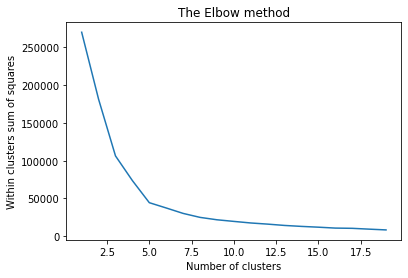

In [18]:
number_clusters = range(1,20)
plt.plot(number_clusters, wss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Within clusters sum of squares")
plt.show()

We can see from 5 there is no much change in sum of squares. So, 5 is the optimal value for k.

## Appling k-means cluster on dataset

In [38]:
# K-means starts with allocating cluster centers randomly and then looks for "better" solutions. 
# K-means++ starts with allocation one cluster center randomly and then searches for other centers given the
# first one
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_ = kmeans.fit_predict(X)

## Visualizing the clusters

In [58]:
y_pred = kmeans.fit(X)

# Labels for the clusters
kmeans.labels_

# Centroids of the clusters
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [47]:
df['predict'] = kmeans.labels_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ['Annual Income','Spending Score'])
centroids.head()

,Annual Income,Spending Score
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


In [48]:
plt.figure(figsize=(7,7))
colors = ["red", "green", "blue", "violet", "yellow"]

# map a color to the cluster_label(0,1,2,3,4) in the order of list taken the values from predict column.
df['color'] = df['predict'].map(lambda p: colors[p])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),predict,color
0,1,Male,19,15,39,4,yellow
1,2,Male,21,15,81,3,violet
2,3,Female,20,16,6,4,yellow
3,4,Female,23,16,77,3,violet
4,5,Female,31,17,40,4,yellow


<Figure size 504x504 with 0 Axes>

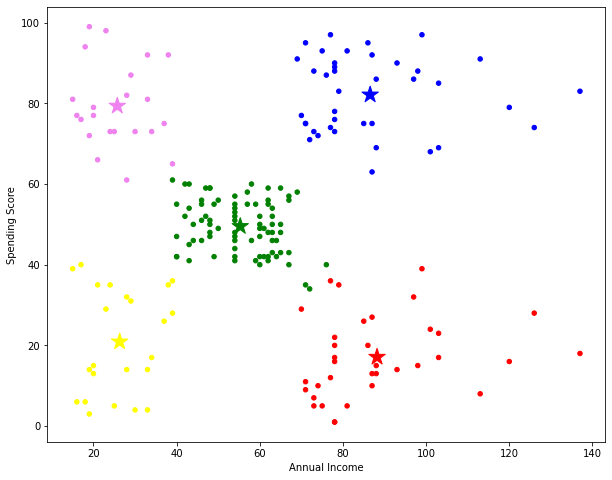

In [56]:
# plotting a scatter plot with the two attributes Annual Income, Spending Score with their respective color
ax = df.plot(kind = "scatter", x="Annual Income (k$)", y="Spending Score (1-100)", figsize=(10,8), c = df['color'])

# plotting the centroid given colors wrt cluster centroids in an order
centroids.plot(kind= "scatter", x = "Annual Income", y ="Spending Score",marker="*",s=300, c=['r','g','b','violet','yellow'],ax= ax)